# Using Data Science to prevent delays on your flights

## Step 1: Import All Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
%matplotlib inline


## Step 2: Importing and understading the Dataset

In [2]:
df = pd.read_csv(r'C:\Users\Larissa\Downloads\data_test.csv',encoding='latin-1')

df.head()

,aircraft_tail,check_c_in_lst_yr,aircraft_years,aircraft_msn,fault_source,deferral_reference,deferral_class,logbook_type,event_type,event_status,...,moc,maintenance_airline_code,maintenance_airline_code_group,fleet,fleet_type,fleet_holding,condicion_mapi,type,type_latam,fault_count
0,PR-MBW,no,11,3710,CABIN,35-30-01A,MEL C,CABIN,CF,CFCERT,...,NaN,A319JJ,A320JJ,A320FAM,NB,BR,LIMPIO,NO TECH,NO TECH,-
1,PT-MZZ,no,19,1593,PILOT,46-21-01A,MEL C,MAINT,CF,CFCERT,...,NaN,A320JJ,A320JJ,A320FAM,NB,BR,LIMPIO,TECH,TECH,FAULT
2,PT-MXL,no,6,5947,PILOT,21-00-04A,MEL C,MAINT,CF,CFCERT,...,NaN,A321JJ,A320JJ,A320FAM,NB,BR,LIMPIO,TECH,TECH,FAULT
3,PR-MBO,yes,13,3156,PILOT,33-40-01B,MEL C,NaN,CF,CFCERT,...,NaN,A320JJ,A320JJ,A320FAM,NB,BR,LIMPIO,TECH,TECH,REPEATED
4,PR-MBZ,no,18,1827,PILOT,36-12-02B,MEL C,MAINT,CF,CFCERT,...,NaN,A320JJ,A320JJ,A320FAM,NB,BR,LIMPIO,TECH,TECH,REPEATED


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15937 entries, 0 to 15936
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   aircraft_tail                   15937 non-null  object 
 1   check_c_in_lst_yr               15937 non-null  object 
 2   aircraft_years                  15937 non-null  int64  
 3   aircraft_msn                    15937 non-null  int64  
 4   fault_source                    15937 non-null  object 
 5   deferral_reference              15933 non-null  object 
 6   deferral_class                  15937 non-null  object 
 7   logbook_type                    13426 non-null  object 
 8   event_type                      15937 non-null  object 
 9   event_status                    15937 non-null  object 
 10  fault_name                      15937 non-null  object 
 11  description                     15351 non-null  object 
 12  barcode                         

In [4]:
df.describe()

,aircraft_years,aircraft_msn,ata_2d,ata_4d,ata_6d,moc
count,15937.000000,15937.000000,15937.000000,15937.000000,15937.000000,1.0
mean,10.923574,8413.483466,32.039593,3212.785154,321280.076614,345995.0
std,4.856661,12270.757021,11.968505,1215.818329,121581.291955,NaN
min,0.000000,24.000000,0.000000,40.000000,4000.000000,345995.0
25%,7.000000,2014.000000,25.000000,2500.000000,250000.000000,345995.0
50%,11.000000,4171.000000,29.000000,2846.000000,284600.000000,345995.0
75%,13.000000,6409.000000,35.000000,3500.000000,350000.000000,345995.0
max,20.000000,42214.000000,80.000000,8013.000000,801300.000000,345995.0


## Step 3: Data Preparation

### Data Cleaning: The columns below don't presented any relevant information to our analysis

In [5]:
df=df.drop(['aircraft_msn','deferral_reference','event_type','found_during_flight','aircraft_assembly','config_slot_details','maintenance_airline_code','maintenance_airline_code_group','fleet_type','fleet_holding','type','type_latam','moc'],axis=1)
df.head()

,aircraft_tail,check_c_in_lst_yr,aircraft_years,fault_source,deferral_class,logbook_type,event_status,fault_name,description,barcode,task_status,flight_arrival_airport,ata_2d,ata_4d,ata_6d,config_slot_name,fleet,condicion_mapi,fault_count
0,PR-MBW,no,11,CABIN,MEL C,CABIN,CFCERT,501173-B-047 REF ITEM RTC BA 652698 - UTILIZAD...,501173-B-047 REF ITEM RTC BA 652698 - UTILIZAD...,T00F8Y6K,COMPLETE,CNF,35,3530,353000,PORTABLE OXYGEN,A320FAM,LIMPIO,-
1,PT-MZZ,no,19,PILOT,MEL C,MAINT,CFCERT,500928-A-037 HORARIO PUSHBACK ACARS INCORRETO ...,HORARIO PUSHBACK ACARS INCORRETO + 5MINUTOS,T00F8Y94,COMPLETE,FLN,46,4621,462100,AIR TRAFFIC INFORMATION MANAGMENT SYSTEM (A.T....,A320FAM,LIMPIO,FAULT
2,PT-MXL,no,6,PILOT,MEL C,MAINT,CFCERT,500995-A-029 MAINTENANCE TEMP CTL 1 AND 2,MAINTENANCE TEMP CTL 1 AND 2 \r\nPERFORMED B...,T00F93J0,COMPLETE,BSB,21,2161,216100,PACK TEMPERATURE CONTROL,A320FAM,LIMPIO,FAULT
3,PR-MBO,yes,13,PILOT,MEL C,NaN,CFCERT,MLB 501345-A-004 NAV TAIL LIGHT 1 INOP,NAV TAIL LIGHT 1 INOP,T00F9E5G,COMPLETE,GIG,33,3341,334100,NAVIGATION LIGHTS,A320FAM,LIMPIO,REPEATED
4,PR-MBZ,no,18,PILOT,MEL C,MAINT,CFCERT,AIR APU BLEED FAULT STUKED IN OPEN POSITION ON...,AIR APU BLEED FAULT STUKED IN OPEN POSITION ON...,T00F9KH4,COMPLETE,GRU,49,4951,495100,BLEED AND SURGE AIR,A320FAM,LIMPIO,REPEATED


### Check and impute missing values

In [6]:
def missing_values_table(df):
    '''
    Input - Dataframe that has all relevant variables for consideration.
    
    Output - Displays the total number of variables/columns in the dataset. In addition, it also 
    generates count of missing values for each column.
    
    '''    
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
    mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
    "There are " + str(mis_val_table_ren_columns.shape[0]) +
    " columns that have missing values.")
    return mis_val_table_ren_columns
    
df_qa=missing_values_table(df)
df_qa

Your selected dataframe has 19 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
logbook_type,2511,15.8
flight_arrival_airport,1644,10.3
description,586,3.7


Here there's a important point about the missing data in the column "flight_arrival_airport". If it's null it's means that the fault was opened during a period of time where the aircraft wasn't flying, so in those cases I'll drop any row with missing value because they don't help with our analysis.

The column "description" has some NaN values but analyzing the table we see that the column "fault_name" has the same information and no null data, so we are going to drop it as well.

In [7]:
df=df[df['flight_arrival_airport'].notna()]
df=df[df['description'].notna()]

The column with most missing values is"logbook_type", we are going to fill this column data based on the rule below:

In [8]:
df['logbook_type'] = df['logbook_type'].fillna(0)
df.head()

,aircraft_tail,check_c_in_lst_yr,aircraft_years,fault_source,deferral_class,logbook_type,event_status,fault_name,description,barcode,task_status,flight_arrival_airport,ata_2d,ata_4d,ata_6d,config_slot_name,fleet,condicion_mapi,fault_count
0,PR-MBW,no,11,CABIN,MEL C,CABIN,CFCERT,501173-B-047 REF ITEM RTC BA 652698 - UTILIZAD...,501173-B-047 REF ITEM RTC BA 652698 - UTILIZAD...,T00F8Y6K,COMPLETE,CNF,35,3530,353000,PORTABLE OXYGEN,A320FAM,LIMPIO,-
1,PT-MZZ,no,19,PILOT,MEL C,MAINT,CFCERT,500928-A-037 HORARIO PUSHBACK ACARS INCORRETO ...,HORARIO PUSHBACK ACARS INCORRETO + 5MINUTOS,T00F8Y94,COMPLETE,FLN,46,4621,462100,AIR TRAFFIC INFORMATION MANAGMENT SYSTEM (A.T....,A320FAM,LIMPIO,FAULT
2,PT-MXL,no,6,PILOT,MEL C,MAINT,CFCERT,500995-A-029 MAINTENANCE TEMP CTL 1 AND 2,MAINTENANCE TEMP CTL 1 AND 2 \r\nPERFORMED B...,T00F93J0,COMPLETE,BSB,21,2161,216100,PACK TEMPERATURE CONTROL,A320FAM,LIMPIO,FAULT
3,PR-MBO,yes,13,PILOT,MEL C,0,CFCERT,MLB 501345-A-004 NAV TAIL LIGHT 1 INOP,NAV TAIL LIGHT 1 INOP,T00F9E5G,COMPLETE,GIG,33,3341,334100,NAVIGATION LIGHTS,A320FAM,LIMPIO,REPEATED
4,PR-MBZ,no,18,PILOT,MEL C,MAINT,CFCERT,AIR APU BLEED FAULT STUKED IN OPEN POSITION ON...,AIR APU BLEED FAULT STUKED IN OPEN POSITION ON...,T00F9KH4,COMPLETE,GRU,49,4951,495100,BLEED AND SURGE AIR,A320FAM,LIMPIO,REPEATED


I wasn't expecting that many values being null in that column, this information does not impact our analysis all that much right now, but it shows a flaw in the process of opening faults, since **15%** of the faults weren't registered correctly. It's not much help to answer our questions but I really think that it's nice insight that can change the quality of the process.


# Step 4: Analysis and Visualization

## Question 1: What is the fleet with most open faults per aircrafts?

Text(0.5, 1.0, 'Fault Rate per Fleet')

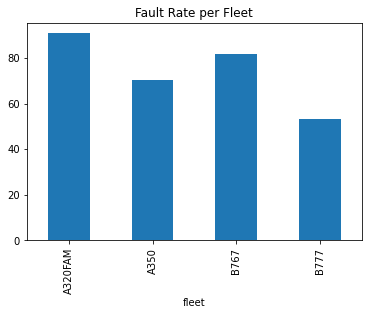

In [24]:
acft_per_fleet = df.groupby(['fleet'])['aircraft_tail'].nunique()
fault_per_fleet = df.groupby(['fleet'])['barcode'].nunique()
rate_fleet = fault_per_fleet/acft_per_fleet
rate_fleet[:4].plot(kind='bar')
plt.title('Fault Rate per Fleet')

In [9]:
dff = df.groupby(['aircraft_tail']).count()['barcode']
dff

aircraft_tail
PR-MAG    108
PR-MAK    146
PR-MAL     84
PR-MAM    114
PR-MAN    114
         ... 
PT-XPL     94
PT-XPM     95
PT-XPN     73
PT-XPO     77
PT-XPQ     68
Name: barcode, Length: 160, dtype: int64

In [10]:
dff = df.groupby('aircraft_tail') \
       .agg({'barcode':'count', 'aircraft_years':'mean'}) \
       .rename(columns={'barcode':'faults','aircraft_years':'acft_age'}) \
       .reset_index()
dfs = dff.sort_values('acft_age', ascending = False)
dfs

,aircraft_tail,faults,acft_age
129,PT-MZI,88,20
128,PT-MZH,102,20
127,PT-MZG,135,20
135,PT-MZZ,123,19
133,PT-MZW,115,19
...,...,...,...
71,PR-TYT,18,0
73,PR-TYV,2,0
72,PR-TYU,3,0
70,PR-TYS,17,0


Text(0.5, 1.0, 'Aircraft Age in Years')

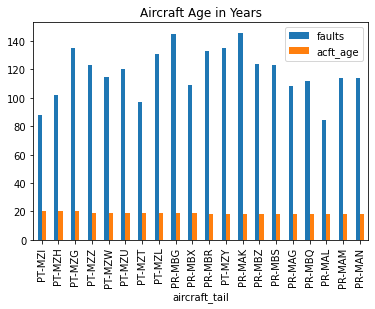

In [11]:
dfs[:20].plot(kind='bar', x='aircraft_tail')
plt.title('Aircraft Age in Years')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002554A9B7850>,
      dtype=object)

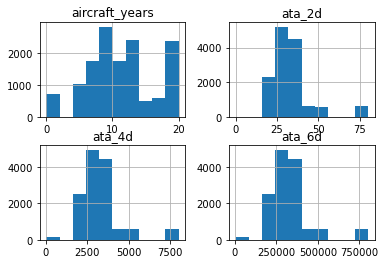

In [12]:
df.hist()

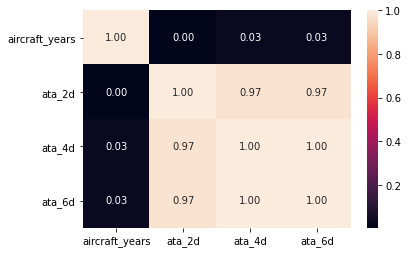

In [13]:
sns.heatmap(df.corr(), annot=True, fmt=".2f");

In [14]:
df.columns

Index(['aircraft_tail', 'check_c_in_lst_yr', 'aircraft_years', 'fault_source',
       'deferral_class', 'logbook_type', 'event_status', 'fault_name',
       'description', 'barcode', 'task_status', 'flight_arrival_airport',
       'ata_2d', 'ata_4d', 'ata_6d', 'config_slot_name', 'fleet',
       'condicion_mapi', 'fault_count'],
      dtype='object')